## Pre Processed Data

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
home_PATH = Path.cwd()
data_PATH = Path(home_PATH,"dados","Train test data").glob('**/*')
data_files = [x for x in data_PATH if x.is_file()]

In [3]:
data_files

[WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/test.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_100_pct.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_10_pct.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_20_pct.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_30_pct.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_40_pct.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_50_pct.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_60_pct.csv'),
 WindowsPath('C:/Users/GabrielLigeiro/Documents/PLN/Projeto 5/dados/Train test data/Train set/train_70_pc

### Test

In [5]:
test = [x for x in data_files if x.name =="test.csv"]

df_test = pd.read_csv(test[0]).drop(columns=['index']).replace({'label': {'true': 1, 'fake': 0}})

In [6]:
df_test.head()

,label,preprocessed_news
0,0,chorando pitangas bonner posta frase dor cotov...
1,0,bahia adolescente anos preve propria morte avi...
2,1,marco bom dia aqui estao principais assuntos v...
3,0,insanidade lula prenderem viro heroi deixarem ...
4,0,crianca apanha mulher petista so porque usava ...


### Train

In [7]:
train = [x for x in data_files if x.name =="train_20_pct.csv"]

df_train = pd.read_csv(train[0]).drop(columns=['index']).replace({'label': {'true': 1, 'fake': 0}})
#df_train = pd.read_csv(train[0]).replace({'label': {'true': 1, 'fake': 0}})

In [8]:
df_train.head()

,label,preprocessed_news
0,1,acervo milhoes registros financeiros paraiso f...
1,0,camarotti delacao odebrecht grupo expressivo p...
2,1,vereadores psdb dizem sofrer pressao aprovar r...
3,1,coreia norte dispara missil curto alcance cost...
4,0,tcu acaba pataquada dilma irregularidades tota...


In [9]:
train_files_aug = ["train_100_pct_augmented.csv","train_90_pct_augmented.csv","train_80_pct_augmented.csv","train_70_pct_augmented.csv","train_60_pct_augmented.csv",
                  "train_50_pct_augmented.csv","train_40_pct_augmented.csv","train_30_pct_augmented.csv","train_20_pct_augmented.csv","train_10_pct_augmented.csv"]

train_files = ["train_100_pct.csv","train_90_pct.csv","train_80_pct.csv","train_70_pct.csv","train_60_pct.csv",
                  "train_50_pct.csv","train_40_pct.csv","train_30_pct.csv","train_20_pct.csv","train_10_pct.csv"]
def train_datas(data_files,train_file_name):
    
    train = [x for x in data_files if x.name ==train_file_name]
    if "augmented" in train_file_name:
        df_train = pd.read_csv(train[0]).replace({'label': {'true': 1, 'fake': 0}})
    else:
        df_train = pd.read_csv(train[0]).drop(columns=['index']).replace({'label': {'true': 1, 'fake': 0}})
    
    return df_train

### Keras

In [10]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

In [11]:
from sklearn.model_selection import train_test_split


X_test = df_test['preprocessed_news']
X_train = df_train['preprocessed_news']
y_test = df_test['label']
y_train = df_train['label']

In [12]:
tfhub_handle_preprocess = "https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2"

tfhub_handle_encoder = "https://tfhub.dev/google/nnlm-es-dim128/2"

def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    #encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
#     outputs = encoder(encoder_inputs)
#     net = outputs['pooled_output']
#    return tf.keras.Model(text_input, net)

    return encoder

In [13]:
UniversalSentence_layer = hub.KerasLayer(build_classifier_model(),
                           #output_shape=[128],
                           input_shape=[],
                           dtype=tf.string,
                           trainable=True,
                           name='encodder')

In [14]:
model = tf.keras.Sequential([
    UniversalSentence_layer,
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.7),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.7),
    tf.keras.layers.Dense(1)
])

In [16]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=tf.metrics.BinaryAccuracy(),
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encodder (KerasLayer)        (None, 128)               125009920 
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [14]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
# num_epochs = 30
# batch_size = 64
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=num_epochs,
#     batch_size=batch_size,
#     validation_data=(X_test, y_test),
# )

In [19]:
# history_dict = history.history
# history_dict.keys()

In [20]:
# best_score = max(history.history['val_binary_accuracy'])
# best_score

In [21]:
# import matplotlib.pyplot as plt

# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss, 'bo', label='Training loss')
# # b is for "solid blue line"
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [22]:
# plt.clf()  # clear figure

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

In [23]:
test = [x for x in data_files if x.name =="test.csv"]

df_test = pd.read_csv(test[0]).drop(columns=['index']).replace({'label': {'true': 1, 'fake': 0}})

In [25]:
num_epochs = 30
batch_size = 64

file_name_hist = []
score_hist_list = []
for train_file_name in train_files_aug+train_files:
    print(train_file_name)
    df_train = train_datas(data_files,train_file_name)
    
    X_test = df_test['preprocessed_news']
    X_train = df_train['preprocessed_news']
    y_test = df_test['label']
    y_train = df_train['label']
    
    history = model.fit(X_train,y_train,epochs=num_epochs,batch_size=batch_size,validation_data=(X_test, y_test))
                        
    score_hist = (train_file_name.replace(".csv",""),max(history.history['val_binary_accuracy']))
    print(score_hist)
    score_hist_list.append(score_hist[1])
    file_name_hist.append(score_hist[0])                        
                        

train_100_pct_augmented.csv
Epoch 1/30
900/900 [==============================] - 49s 52ms/step - loss: 1.5144 - binary_accuracy: 0.8795 - val_loss: 0.6107 - val_binary_accuracy: 0.9458
Epoch 2/30
900/900 [==============================] - 46s 52ms/step - loss: 0.9417 - binary_accuracy: 0.9269 - val_loss: 0.5567 - val_binary_accuracy: 0.9583
Epoch 3/30
900/900 [==============================] - 45s 50ms/step - loss: 0.7422 - binary_accuracy: 0.9419 - val_loss: 0.5140 - val_binary_accuracy: 0.9583
Epoch 4/30
900/900 [==============================] - 45s 49ms/step - loss: 0.6232 - binary_accuracy: 0.9512 - val_loss: 0.5022 - val_binary_accuracy: 0.9611
Epoch 5/30
900/900 [==============================] - 44s 49ms/step - loss: 0.5465 - binary_accuracy: 0.9571 - val_loss: 0.4767 - val_binary_accuracy: 0.9660
Epoch 6/30
900/900 [==============================] - 44s 49ms/step - loss: 0.4624 - binary_accuracy: 0.9632 - val_loss: 0.5825 - val_binary_accuracy: 0.9576
Epoch 7/30
900/900 [====

In [26]:
import matplotlib.pyplot as plt

In [27]:
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

In [39]:
percentual

array([100,  90,  80,  70,  60,  50,  40,  30,  20,  10])

In [28]:
acc_aug,acc_normal = split_list(score_hist_list)

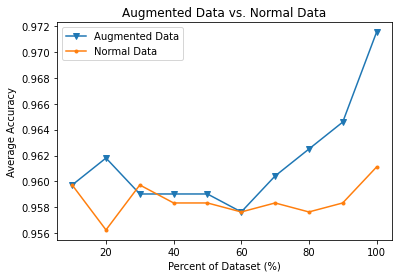

In [41]:
percentual = np.arange(100, 0,-10)

# "bo" is for "blue dot"
plt.plot(percentual, acc_aug, 'v-', label='Augmented Data')
# b is for "solid blue line"
plt.plot(percentual, acc_normal, '.-', label='Normal Data')
plt.title('Augmented Data vs. Normal Data')
plt.xlabel('Percent of Dataset (%)')
plt.ylabel('Average Accuracy')
plt.legend()
plt.savefig('Augmented Data vs Normal Data.png',dpi=800)
plt.show()
